In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
ds=pd.read_csv('./mnist_data/train.csv')
print ds.shape
print ds.head(n=5)

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0      

(42000L, 785L)
(42000L,) (42000L, 784L)


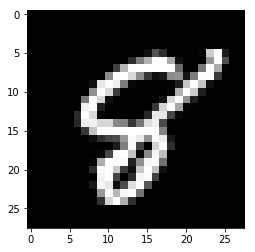

8


In [5]:
data=ds.values
print data.shape
y_train=data[:,0]
X_train=data[:,1:]
print y_train.shape, X_train.shape

plt.figure(0)
plt.imshow(X_train[1204].reshape((28,28)),cmap='gray')
plt.show()
print y_train[1204]

In [6]:
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum());

#Manhatton distance
def dist2(x1,x2):
    return abs(x1-x2).sum();

#Hellinger distance
def dist3(x1,x2):
    f=0.5*((np.sqrt(x1)-np.sqrt(x2))**2).sum();
    return np.sqrt(f);

In [7]:
def knn(X_train,x,y_train,k=5):
    vals=[]
    for ix in range(X_train.shape[0]):
        v=[dist2(x,X_train[ix,:]), y_train[ix]]
        vals.append(v)
    updated_vals=sorted(vals,key=lambda x:x[0])
    pred_arr=np.asarray(updated_vals[:k])
    pred_arr=np.unique(pred_arr,return_counts=True)
    pred=pred_arr[1].argmax()
    return pred_arr[0][pred]

2
2


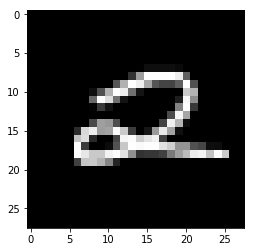

In [8]:
idq=int(np.random.random()*X_train.shape[0])
q=X_train[idq]

res=knn(X_train[:10000],q,y_train,k=7)
print res
print y_train[idq]

plt.figure(0)
plt.imshow(q.reshape((28,28)),cmap='gray')
plt.show()

In [12]:
#Calculate accuracy
for idq in range(10000,15000):
    q=X_train[idq]
    res=knn(X_train[10000:15000],q,y_train,k=7)
    count=0
    if res!=y_train[idq]:
        count=count+1
accuracy=(count/5000.0)*100
print 100-accuracy,'%'

99.98 %
